**IMPORTING ALL THE NECESSARY MODULES**

In [1]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**READING THE IRIS.CSV FILE**

In [2]:
data=pd.read_csv('Iris.csv')
data #REPRESENTING DATA

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info() #GETTING INFORMATION OF ALL COLUMNS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.drop('Id',axis=1,inplace=True) #DROPPING THE ID COLUMN AS IT IS UN-NECCESSARY

In [5]:
data.isnull().any().any() #CHECKING IF THERE IS ANY NULL DATA OR NOT

False

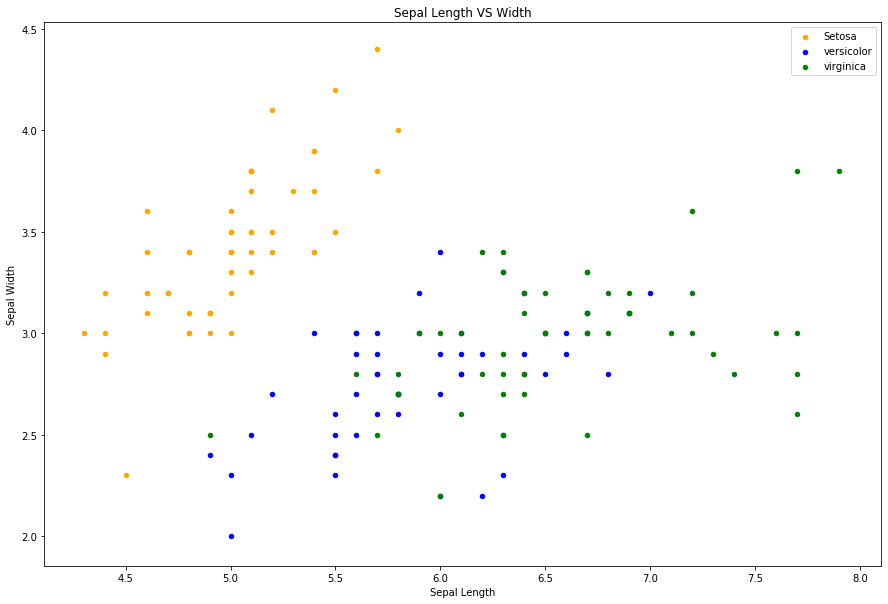

In [6]:
#PLOTING THE DATA USING FEATURES SEPAL LENGTH AND WIDTH
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

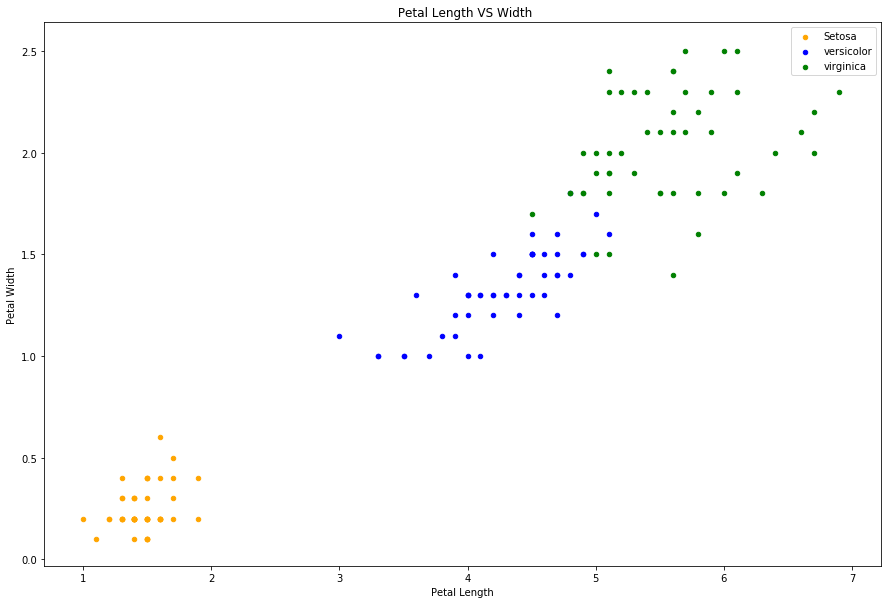

In [7]:
#PLOTING THE DATA USING FEATURES PETAL LENGTH AND PETAL WIDTH
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [8]:
#DEFINING A TABLE TO STORE ALL THE COMPUTATIONS
column_names = ['Classifier','Error','Misclassification rate','mean error','mean square error','mean absolute error']
df = pd.DataFrame(columns = column_names)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error


**SPLITTING DATA**

In [9]:
data_class1=data[0:50] #CLASS C1

In [10]:
data_class2=data[50:100] #CLASS C2

In [11]:
data_class3=data[100:150] #CLASS C3

**TRAINING AND TESTING DATA SPLIT**

In [12]:
train_class1, test_class1 = train_test_split(data_class1, test_size = 0.4) #TRAIN CLASS C1 AND TEST CLASS C1

In [13]:
train_class2, test_class2 = train_test_split(data_class2, test_size = 0.4) #TRAIN CLASS C2 AND TEST CLASS C2

In [14]:
train_class3, test_class3 = train_test_split(data_class3, test_size = 0.4) #TRAIN CLASS C3 AND TEST CLASS C3

**FINDING THE CENTRIODS OF TRAIN CLASS**

In [15]:
center11=list(train_class1.mean()) #CENTROID 1
print(center11)

[5.056666666666668, 3.4466666666666668, 1.493333333333333, 0.2666666666666667]


In [16]:
center22=list(train_class2.mean()) #CENTROID 2
print(center22)

[6.086666666666665, 2.850000000000001, 4.416666666666667, 1.4199999999999997]


In [17]:
center33=list(train_class3.mean()) #CENTROID 3
print(center33)

[6.533333333333333, 3.0399999999999996, 5.513333333333333, 2.056666666666666]


**OPERATIONS ON TEST CLASS**

In [18]:
test_class1=test_class1.append(test_class2) #APPENDING TEST CLASSES INTO ONE

In [19]:
test_class1=test_class1.append(test_class3) #APPENDING TEST CLASSES INTO ONE

In [20]:
print(test_class1.shape) #CHECKING THE SHAPE AFTER MERGING

(60, 5)


In [21]:
test_class11=test_class1[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

**EUCLIDEAN CLASSIFIER**

In [22]:
from math import * #FUNCTION FOR EUCLIDEAN-DISTANCE
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))

In [23]:
test_class1.shape

(60, 5)

In [24]:
#EUCLIDEAN CLASSIFIER
l1=[]
l2=[]
count_eucd=0
mean_error_eucd=0
for index,row in test_class1.iterrows():
    eucd_train1_test1=0
    eucd_train2_test1=0
    eucd_train3_test1=0
    i=list(row)
    j=i[:4]
    eucd_train1_test1=euclidean_distance(j,center11)
    eucd_train2_test1=euclidean_distance(j,center22)
    eucd_train3_test1=euclidean_distance(j,center33)
    min1=min(eucd_train1_test1,eucd_train2_test1,eucd_train3_test1)
    if(min1==eucd_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==eucd_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class1['Predicted']=l1
for index,row in test_class1.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class1['Error']=l2
for index,row in test_class1.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        k=0
        k2=0
        count_eucd=count_eucd+1
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_eucd=mean_error_eucd+(euclidean_distance(j,k)-euclidean_distance(j,k2))
mean_error_eucd=mean_error_eucd/count_eucd
print("mean error is:",mean_error_eucd)
print("mean square error is: ",n.square(mean_error_eucd))
print("mean absolute error is: ",mean_error_eucd)
print("error count is: ",count_eucd)
print("misclassification rate is: ",count_eucd/60)
test_class1

mean error is: 0.20157041615875881
mean square error is:  0.040630632670415216
mean absolute error is:  0.20157041615875881
error count is:  4
misclassification rate is:  0.06666666666666667


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [25]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'Euclidean','Error':count_eucd,'Misclassification rate':count_eucd/60,'mean error':mean_error_eucd,'mean square error':n.square(mean_error_eucd),'mean absolute error':mean_error_eucd}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.20157,0.040631,0.20157


**CITYBLOCK DISTANCE**

In [26]:
test_class22=test_class11[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [27]:
def cityblock_distance(A, B): #DEFINING CITYBLOCK DISTANCE
    result = n.sum([abs(a - b) for (a, b) in zip(A, B)]) 
    return result

In [29]:
#CITYBLOCK CLASSIFIER
l1=[]
l2=[]
count_cb=0
mean_error_cb=0
for index,row in test_class11.iterrows():
    cb_train1_test1=0
    cb_train2_test1=0
    cb_train3_test1=0
    i=list(row)
    j=i[:4]
    cb_train1_test1=cityblock_distance(j,center11)
    cb_train2_test1=cityblock_distance(j,center22)
    cb_train3_test1=cityblock_distance(j,center33)
    min1=min(cb_train1_test1,cb_train2_test1,cb_train3_test1)
    if(min1==cb_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==cb_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class11['Predicted']=l1
for index,row in test_class11.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class11['Error']=l2
for index,row in test_class11.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        count_cb=count_cb+1
        k=0
        k2=0
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_cb=mean_error_cb+(cityblock_distance(j,k)-cityblock_distance(j,k2))
mean_error_cb=mean_error_cb/count_cb
print("mean error is:",mean_error_cb)
print("mean square error is: ",n.square(mean_error_cb))
print("mean absolute error is: ",mean_error_cb)
print("error count is: ",count_cb)
print("misclassification rate is: ",count_cb/60)
test_class11

mean error is: 0.436666666666665
mean square error is:  0.1906777777777763
mean absolute error is:  0.436666666666665
error count is:  4
misclassification rate is:  0.06666666666666667


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [30]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'CityBlock','Error':count_cb,'Misclassification rate':count_cb/60,'mean error':mean_error_cb,'mean square error':n.square(mean_error_cb),'mean absolute error':mean_error_cb}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667


**MINKOWISKI DISTANCE**

In [31]:
test_class33=test_class22[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [32]:
p=int(input("Enter the value of p for Minkowiski Distance:")) #ENTER ANY VALUE FOR P BETWEEN 1 TO INFINITY

Enter the value of p for Minkowiski Distance:6


In [33]:
def minkowski_distance(a, b, p): #DEFINING MINKOWISKI DISTANCE
    return sum(abs(e1-e2)*p for e1, e2 in zip(a,b))*(1/p)

In [36]:
#DEFINING MINKOWISKI CLASSIFIER
l1=[]
l2=[]
count_md=0
mean_error_md=0
for index,row in test_class22.iterrows():
    md_train1_test1=0
    md_train2_test1=0
    md_train3_test1=0
    i=list(row)
    j=i[:4]
    md_train1_test1=minkowski_distance(j,center11,p)
    md_train2_test1=minkowski_distance(j,center22,p)
    md_train3_test1=minkowski_distance(j,center33,p)
    min1=min(md_train1_test1,md_train2_test1,md_train3_test1)
    if(min1==md_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==md_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class22['Predicted']=l1
for index,row in test_class22.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class22['Error']=l2
for index,row in test_class22.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        count_md=count_md+1
        k=0
        k2=0
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_md=mean_error_md+(minkowski_distance(j,k,p)-minkowski_distance(j,k2,p))
mean_error_md=mean_error_md/count_md
print("mean error is:",mean_error_md)
print("mean square error is: ",n.square(mean_error_md))
print("mean absolute error is: ",mean_error_md)
print("error count is: ",count_md)
print("misclassification rate is: ",count_md/60)
test_class22

mean error is: 0.4366666666666652
mean square error is:  0.1906777777777765
mean absolute error is:  0.4366666666666652
error count is:  4
misclassification rate is:  0.06666666666666667


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [37]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'Minkowiski','Error':count_md,'Misclassification rate':count_md/60,'mean error':mean_error_md,'mean square error':n.square(mean_error_md),'mean absolute error':mean_error_md}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667


**CHEBYSHEV DISTANCE**

In [38]:
test_class44=test_class33[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [39]:
from numpy import * #DEFINING CHEBYSHEV DISTANCE
def chebyshev_distance(A, B): 
    result = ([abs(a-b).max() for (a, b) in zip(A, B)]) 
    return result

In [41]:
#DEFINING CHEBYSHEV CLASSIFIER
l1=[]
l2=[]
count_cv=0
mean_error_cv=0
for index,row in test_class33.iterrows():
    cv_train1_test1=0
    cv_train2_test1=0
    cv_train3_test1=0
    i=list(row)
    j=i[:4]
    cv_train1_test1=chebyshev_distance(mat(j),mat(center11))
    cv_train2_test1=chebyshev_distance(mat(j),mat(center22))
    cv_train3_test1=chebyshev_distance(mat(j),mat(center33))
    min1=min(cv_train1_test1,cv_train2_test1,cv_train3_test1)
    if(min1==cv_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==cv_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class33['Predicted']=l1
for index,row in test_class33.iterrows():
    i=list(row)
    j=i[:4]
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class33['Error']=l2
for index,row in test_class33.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        count_cv=count_cv+1
        k=0
        k2=0
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_cv=mean_error_cv+(sum(chebyshev_distance(mat(j),mat(k)))-sum(chebyshev_distance(mat(j),mat(k2))))
mean_error_cv=mean_error_cv/count_cv
print("mean error is:",mean_error_cv)
print("mean square error is: ",n.square(mean_error_cv))
print("mean absolute error is: ",mean_error_cv)
print("error count is: ",count_cv)
print("misclassification rate is: ",count_cv/60)
test_class33

mean error is: 0.264444444444444
mean square error is:  0.06993086419753063
mean absolute error is:  0.264444444444444
error count is:  3
misclassification rate is:  0.05


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [42]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'Chevyshev','Error':count_cv,'Misclassification rate':count_cv/60,'mean error':mean_error_cv,'mean square error':n.square(mean_error_cv),'mean absolute error':mean_error_cv}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667
3,Chevyshev,3,0.050000,0.264444,0.069931,0.264444


**BRAYCURTIS DISTANCE**

In [43]:
test_class55=test_class44[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [44]:
from scipy.spatial.distance import braycurtis #DEFINING BRAYCURTIS DISTANCE
def Braycurtis_distance(a,b):
    return braycurtis(a, b)

In [46]:
#DEFINING BRAYCURTIS CLASSIFIER
l1=[]
l2=[]
count_bd=0
mean_error_bd=0
for index,row in test_class44.iterrows():
    bd_train1_test1=0
    bd_train2_test1=0
    bd_train3_test1=0
    i=list(row)
    j=i[:4]
    bd_train1_test1=Braycurtis_distance(j,center11)
    bd_train2_test1=Braycurtis_distance(j,center22)
    bd_train3_test1=Braycurtis_distance(j,center33)
    min1=min(bd_train1_test1,bd_train2_test1,bd_train3_test1)
    if(min1==bd_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==bd_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class44['Predicted']=l1
for index,row in test_class44.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class44['Error']=l2
for index,row in test_class44.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        count_bd=count_bd+1
        k=0
        k2=0
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_bd=mean_error_bd+(Braycurtis_distance(j,k)-Braycurtis_distance(j,k2))
mean_error_bd=mean_error_bd/count_bd
print("mean error is:",mean_error_bd)
print("mean square error is: ",n.square(mean_error_bd))
print("mean absolute error is: ",mean_error_bd)
print("error count is: ",count_bd)
print("misclassification rate is: ",count_bd/60)
test_class44

mean error is: 0.014366112938296422
mean square error is:  0.00020638520095588785
mean absolute error is:  0.014366112938296422
error count is:  3
misclassification rate is:  0.05


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [47]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'BrayCurtis','Error':count_bd,'Misclassification rate':count_bd/60,'mean error':mean_error_bd,'mean square error':n.square(mean_error_bd),'mean absolute error':mean_error_bd}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667
3,Chevyshev,3,0.050000,0.264444,0.069931,0.264444
4,BrayCurtis,3,0.050000,0.014366,0.000206,0.014366


**CANBERRA DISTANCE**

In [48]:
test_class66=test_class55[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [49]:
from scipy.spatial.distance import canberra #DEFINING CANBERRA DISTANCE
def Canberra_distance(a,b):
    return canberra(a, b)

In [51]:
#DEFINING CANBERRA CLASSIFIER
l1=[]
l2=[]
count_cn=0
mean_error_cn=0
for index,row in test_class55.iterrows():
    cn_train1_test1=0
    cn_train2_test1=0
    cn_train3_test1=0
    i=list(row)
    j=i[:4]
    cn_train1_test1=Canberra_distance(j,center11)
    cn_train2_test1=Canberra_distance(j,center22)
    cn_train3_test1=Canberra_distance(j,center33)
    min1=min(cn_train1_test1,cn_train2_test1,cn_train3_test1)
    if(min1==cn_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==cn_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class55['Predicted']=l1
for index,row in test_class55.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class55['Error']=l2
for index,row in test_class55.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        count_cn=count_cn+1
        k=0
        k2=0
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_cn=mean_error_cn+(Canberra_distance(j,k)-Canberra_distance(j,k2))
mean_error_cn=mean_error_cn/count_cn
print("mean error is:",mean_error_cn)
print("mean square error is: ",n.square(mean_error_cn))
print("mean absolute error is: ",mean_error_cn)
print("error count is: ",count_cn)
print("misclassification rate is: ",count_cn/60)
test_class55

mean error is: 0.15621703591558528
mean square error is:  0.02440376231025126
mean absolute error is:  0.15621703591558528
error count is:  2
misclassification rate is:  0.03333333333333333


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [52]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'Canberra','Error':count_cn,'Misclassification rate':count_cn/60,'mean error':mean_error_cn,'mean square error':n.square(mean_error_cn),'mean absolute error':mean_error_cn}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667
3,Chevyshev,3,0.050000,0.264444,0.069931,0.264444
4,BrayCurtis,3,0.050000,0.014366,0.000206,0.014366
5,Canberra,2,0.033333,0.156217,0.024404,0.156217


**CORRELATION DISTANCE**

In [53]:
test_class77=test_class66[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [54]:
import scipy.stats #DEFINING CORRELATION DISTANCE
def correlation_distance(a,b):
    return scipy.stats.pearsonr(a, b)[0] 

In [56]:
#DEFINING CORRELATION CLASSIFIER
l1=[]
l2=[]
count_co=0
mean_error_co=0
for index,row in test_class66.iterrows():
    co_train1_test1=0
    co_train2_test1=0
    co_train3_test1=0
    i=list(row)
    j=i[:4]
    co_train1_test1=1-correlation_distance(j,center11)
    co_train2_test1=1-correlation_distance(j,center22)
    co_train3_test1=1-correlation_distance(j,center33)
    l3=[co_train1_test1,co_train2_test1,co_train3_test1]
    if(len(set(l3))!=3):
        l1.append(i[4])
    else:
        min1=min(co_train1_test1,co_train2_test1,co_train3_test1)
        if(min1==co_train1_test1):
            l1.append('Iris-setosa')
        elif(min1==co_train2_test1):
            l1.append('Iris-versicolor')
        else:
            l1.append('Iris-virginica')
test_class66['Predicted']=l1
for index,row in test_class66.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class66['Error']=l2
for index,row in test_class66.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        k=0
        k2=0
        count_co=count_co+1
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_co=mean_error_co+((1-correlation_distance(j,k))-(1-correlation_distance(j,k2)))
if(count_co!=0):
    mean_error_co=mean_error_co/count_co
else:
    mean_error_co=0
print("mean error is:",mean_error_co)
print("mean square error is: ",n.square(mean_error_co))
print("mean absolute error is: ",mean_error_co)
print("error count is: ",count_co)
print("misclassification rate is: ",count_co/60)
test_class66

mean error is: 0.0029448728148966374
mean square error is:  8.672275895917245e-06
mean absolute error is:  0.0029448728148966374
error count is:  1
misclassification rate is:  0.016666666666666666


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [57]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'Correlation','Error':count_co,'Misclassification rate':count_co/60,'mean error':mean_error_co,'mean square error':n.square(mean_error_co),'mean absolute error':mean_error_co}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667
3,Chevyshev,3,0.050000,0.264444,0.069931,0.264444
4,BrayCurtis,3,0.050000,0.014366,0.000206,0.014366
5,Canberra,2,0.033333,0.156217,0.024404,0.156217
6,Correlation,1,0.016667,0.002945,0.000009,0.002945


**COSINE DISTANCE**

In [58]:
test_class88=test_class77[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [59]:
from scipy.spatial.distance import cosine #DEFINING COSINE DISTANCE
def cosine_similarity(v1,v2):
    return cosine(v1,v1)

In [61]:
#DEFINING COSINE CLASSIFIER
l1=[]
l2=[]
count_c=0
mean_count_c=0
for index,row in test_class77.iterrows():
    co_train1_test1=0
    co_train2_test1=0
    co_train3_test1=0
    i=list(row)
    j=i[:4]
    co_train1_test1=cosine_similarity(j,center11)
    co_train2_test1=cosine_similarity(j,center22)
    co_train3_test1=cosine_similarity(j,center33)
    l3=[co_train1_test1,co_train2_test1,co_train3_test1]
    if(len(set(l3))!=3):
        l1.append(i[4])
    else:
        min1=min(co_train1_test1,co_train2_test1,co_train3_test1)
        if(min1==co_train1_test1):
            l1.append('Iris-setosa')
        elif(min1==co_train2_test1):
            l1.append('Iris-versicolor')
        else:
            l1.append('Iris-virginica')
test_class77['Predicted']=l1
for index,row in test_class77.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class77['Error']=l2
for index,row in test_class77.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        count_c=count_c+1
        k=0
        k2=0
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_c=mean_error_c+(cosine_similarity(j,k)-cosine_similarity(j,k2))
if(count_c!=0):
    mean_error_c=mean_error_c/count_c
else:
    mean_error_c=0
print("mean error is:",mean_error_c)
print("mean square error is: ",n.square(mean_error_c))
print("mean absolute error is: ",mean_error_c)
print("error count is: ",count_c)
print("misclassification rate is: ",count_c/60)
test_class77

mean error is: 0
mean square error is:  0
mean absolute error is:  0
error count is:  0
misclassification rate is:  0.0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [62]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'Cosine','Error':count_c,'Misclassification rate':count_c/60,'mean error':mean_error_c,'mean square error':n.square(mean_error_c),'mean absolute error':mean_error_c}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667
3,Chevyshev,3,0.050000,0.264444,0.069931,0.264444
4,BrayCurtis,3,0.050000,0.014366,0.000206,0.014366
5,Canberra,2,0.033333,0.156217,0.024404,0.156217
6,Correlation,1,0.016667,0.002945,0.000009,0.002945
7,Cosine,0,0.000000,0.000000,0.000000,0.000000


**CHESSBLOCK DISTANCE**

In [63]:
test_class99=test_class88[:] #SAVING A COPY FOR FURTHER CLASSIFIERS

In [64]:
def Chessblock_distance(A,B): #DEFINING CHESSBLOCK DISTANCE
    result = n.sum([abs(a - b) for (a, b) in zip(A, B)]) 
    return result

In [66]:
#DEFINING CHESSBLOCK CLASSIFIER
l1=[]
l2=[]
count_ck=0
mean_error_ck=0
for index,row in test_class88.iterrows():
    ck_train1_test1=0
    ck_train2_test1=0
    ck_train3_test1=0
    i=list(row)
    j=i[:4]
    ck_train1_test1=Chessblock_distance(mat(j),mat(center11))
    ck_train2_test1=Chessblock_distance(mat(j),mat(center22))
    ck_train3_test1=Chessblock_distance(mat(j),mat(center33))
    min1=min(ck_train1_test1,ck_train2_test1,ck_train3_test1)
    if(min1==ck_train1_test1):
        l1.append('Iris-setosa')
    elif(min1==ck_train2_test1):
        l1.append('Iris-versicolor')
    else:
        l1.append('Iris-virginica')
test_class88['Predicted']=l1
for index,row in test_class88.iterrows():
    i=list(row)
    if(i[4]==i[5]):
        l2.append(0)
    else:
        l2.append(1)
test_class88['Error']=l2
for index,row in test_class88.iterrows():
    i=list(row)
    j=i[:4]
    if(i[6]==1):
        k=0
        k2=0
        count_ck=count_ck+1
        if(i[4]=='Iris-setosa'):
            k=center11
        elif(i[4]=='Iris-versicolor'):
            k=center22
        else:
            k=center33
        if(i[5]=='Iris-setosa'):
            k2=center11
        elif(i[5]=='Iris-versicolor'):
            k2=center22
        else:
            k2=center33
        mean_error_ck=mean_error_ck+(sum(Chessblock_distance(mat(j),mat(k)))-sum(Chessblock_distance(mat(j),mat(k2))))
if(count_ck!=0):
    mean_error_ck=mean_error_ck/count_ck
else:
    mean_error_ck=0
print("mean error is:",mean_error_ck)
print("mean square error is: ",n.square(mean_error_ck))
print("mean absolute error is: ",mean_error_ck)
print("error count is: ",count_ck)
print("misclassification rate is: ",count_ck/60)
test_class88

mean error is: 0.436666666666665
mean square error is:  0.1906777777777763
mean absolute error is:  0.436666666666665
error count is:  4
misclassification rate is:  0.06666666666666667


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Error
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0


In [67]:
#UPDATING THE RESULT DATA
new_row = {'Classifier':'ChessBlock','Error':count_ck,'Misclassification rate':count_ck/60,'mean error':mean_error_ck,'mean square error':n.square(mean_error_ck),'mean absolute error':mean_error_ck}
df = df.append(new_row, ignore_index=True)
df

,Classifier,Error,Misclassification rate,mean error,mean square error,mean absolute error
0,Euclidean,4,0.066667,0.201570,0.040631,0.201570
1,CityBlock,4,0.066667,0.436667,0.190678,0.436667
2,Minkowiski,4,0.066667,0.436667,0.190678,0.436667
3,Chevyshev,3,0.050000,0.264444,0.069931,0.264444
4,BrayCurtis,3,0.050000,0.014366,0.000206,0.014366
5,Canberra,2,0.033333,0.156217,0.024404,0.156217
6,Correlation,1,0.016667,0.002945,0.000009,0.002945
7,Cosine,0,0.000000,0.000000,0.000000,0.000000
8,ChessBlock,4,0.066667,0.436667,0.190678,0.436667


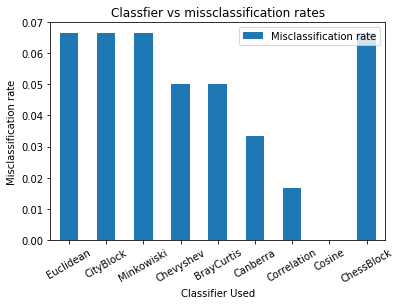

In [70]:
#BAR GRAPH FOR CLASSIFIER VS CLASSIFICATION RATE
plotdata = pd.DataFrame(
    {"Misclassification rate": [count_eucd/60,count_cb/60,count_md/60,count_cv/60,count_bd/60,count_cn/60,count_co/60,count_c/60,count_ck/60]}, 
    index=["Euclidean","CityBlock","Minkowiski","Chevyshev","BrayCurtis","Canberra","Correlation","Cosine","ChessBlock"])
# Plot a bar chart

plotdata.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Classfier vs missclassification rates")
plt.xlabel("Classifier Used")
plt.ylabel("Misclassification rate")

plt.show()

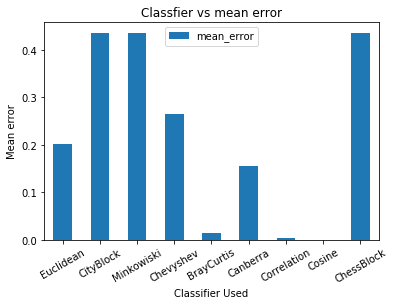

In [71]:
#BAR GRAPH FOR CLASSIFIER VS MEAN ERROR 
plotdata = pd.DataFrame(
    {"mean_error": [mean_error_eucd,mean_error_cb,mean_error_md,mean_error_cv,mean_error_bd,mean_error_cn,mean_error_co,mean_error_c,mean_error_ck]}, 
    index=["Euclidean","CityBlock","Minkowiski","Chevyshev","BrayCurtis","Canberra","Correlation","Cosine","ChessBlock"])
# Plot a bar chart

plotdata.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Classfier vs mean error")
plt.xlabel("Classifier Used")
plt.ylabel("Mean error")

plt.show()

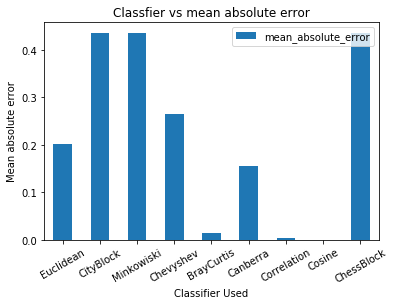

In [72]:
#BAR GRAPH FOR CLASSIFIER VS MEAN ABSOLUTE ERROR
plotdata = pd.DataFrame(
    {"mean_absolute_error": [mean_error_eucd,mean_error_cb,mean_error_md,mean_error_cv,mean_error_bd,mean_error_cn,mean_error_co,mean_error_c,mean_error_ck]}, 
    index=["Euclidean","CityBlock","Minkowiski","Chevyshev","BrayCurtis","Canberra","Correlation","Cosine","ChessBlock"])
# Plot a bar chart

plotdata.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Classfier vs mean absolute error")
plt.xlabel("Classifier Used")
plt.ylabel("Mean absolute error")

plt.show()

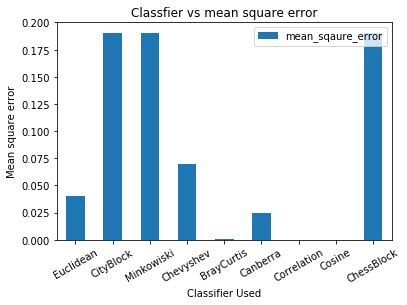

In [73]:
#BAR GRAPH FOR CLASSIFIER VS MEAN SQUARE ERROR
plotdata = pd.DataFrame(
    {"mean_sqaure_error": [n.square(mean_error_eucd),n.square(mean_error_cb),n.square(mean_error_md),n.square(mean_error_cv),n.square(mean_error_bd),n.square(mean_error_cn),n.square(mean_error_co),n.square(mean_error_c),n.square(mean_error_ck)]}, 
    index=["Euclidean","CityBlock","Minkowiski","Chevyshev","BrayCurtis","Canberra","Correlation","Cosine","ChessBlock"])
# Plot a bar chart

plotdata.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Classfier vs mean square error")
plt.xlabel("Classifier Used")
plt.ylabel("Mean square error")

plt.show()

**SUBMITTED BY APRAJITA CHHAWI(INFORMATION SECURITY) 220CS2599**